# Ford Gobike Data Exploration

## Preliminary Wrangling

This document explores a dataset containing the trip data of the fordgo bike.

In [0]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import zipfile
import glob

%matplotlib inline

In [0]:

sparkdf = spark.sql("select * from 201902_fordgobike_tripdata_21")
df = sparkdf.toPandas()
df.head()

Out[7]:

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,704,2019-02-19 08:34:24.0330,2019-02-19 08:46:08.7350,58,Market St at 10th St,37.776619,-122.417385,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5057,Subscriber,None,None,No
1,455,2019-02-19 08:38:32.8520,2019-02-19 08:46:08.5970,21,Montgomery St BART Station (Market St at 2nd St),37.7896254,-122.400811,50,2nd St at Townsend St,37.780526,-122.390288,5527,Subscriber,1991,Male,No
2,890,2019-02-19 08:31:13.6440,2019-02-19 08:46:04.1130,75,Market St at Franklin St,37.7737932060887,-122.42123901844025,6,The Embarcadero at Sansome St,37.80477,-122.403234,5903,Subscriber,1987,Male,No
3,315,2019-02-19 08:40:48.6640,2019-02-19 08:46:03.9470,5,Powell St BART Station (Market St at 5th St),37.783899357084934,-122.40844488143921,64,5th St at Brannan St,37.7767539,-122.3990176,4385,Subscriber,1971,Male,No
4,128,2019-02-19 08:43:55.0840,2019-02-19 08:46:03.8980,104,4th St at 16th St,37.76704457969368,-122.39083349704742,116,Mississippi St at 17th St,37.7648022,-122.3947713,6563,Subscriber,1985,Male,No


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 183412 non-null object 
 1 start_time 183412 non-null datetime64[ns]
 2 end_time 183412 non-null datetime64[ns]
 3 start_station_id 183412 non-null object 
 4 start_station_name 183412 non-null object 
 5 start_station_latitude 183412 non-null object 
 6 start_station_longitude 183412 non-null object 
 7 end_station_id 183412 non-null object 
 8 end_station_name 183412 non-null object 
 9 end_station_latitude 183412 non-null object 
 10 end_station_longitude 183412 non-null object 
 11 bike_id 183412 non-null object 
 12 user_type 183412 non-null object 
 13 member_birth_year 175147 non-null object 
 14 member_gender 175147 non-null object 
 15 bike_share_for_all_trip 183412 non-null bool 
dtypes: bool(1), datetime64[ns](2), object(13)
memory usage: 21.2+ MB

In [0]:
# changement du type de start_time et end_time en datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [0]:
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 duration_sec 183412 non-null object 
 1 start_time 183412 non-null datetime64[ns]
 2 end_time 183412 non-null datetime64[ns]
 3 start_station_id 183412 non-null object 
 4 start_station_name 183412 non-null object 
 5 start_station_latitude 183412 non-null object 
 6 start_station_longitude 183412 non-null object 
 7 end_station_id 183412 non-null object 
 8 end_station_name 183412 non-null object 
 9 end_station_latitude 183412 non-null object 
 10 end_station_longitude 183412 non-null object 
 11 bike_id 183412 non-null object 
 12 user_type 183412 non-null object 
 13 member_birth_year 175147 non-null object 
 14 member_gender 175147 non-null object 
 15 bike_share_for_all_trip 183412 non-null bool 
dtypes: bool(1), datetime64[ns](2), object(13)
memory usage: 21.2+ MB

In [0]:
df.describe()

<command-4204122851875679>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
 df.describe()
<command-4204122851875679>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
 df.describe()
Out[18]:

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183412,183412,183412,183412,183412,183412,183412,183412,183412,183412,183412,183412,183412,175147,175147,183412
unique,4752,183401,183397,330,330,334,335,330,330,335,335,4646,2,75,3,1
top,272,2019-02-07 09:06:07.056000,2019-02-12 09:07:04.475000,58,Market St at 10th St,37.776619,-122.417385,67,San Francisco Caltrain Station 2 (Townsend St...,37.7766392,-122.3955263,4794,Subscriber,1988,Male,False
freq,311,2,2,3904,3904,3904,3904,4857,4857,4857,4857,191,163544,10236,130651,183412
first,NaN,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What is the structure of your dataset?
There are 183412 fordgobike trips in the dataset with 16 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out how trip duration is dependent on other specifications from the dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that trip duration is highly dependent on the start stations and end stations, more crowded places should receive more rides so some stations should be logging more duration sec. I also think user_type, birthyear and gender should also effect trip duration.

## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: duration_sec.

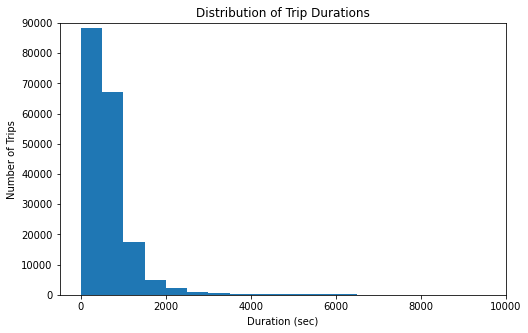

In [0]:
#set duration_sec as integer type
df['duration_sec'] = df['duration_sec'].astype('float64')

binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

There is a long tail in the distribution so lets put it on log scale.

<command-4204122851875684>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
 plt.axis([0, 10000, 0, 15000])

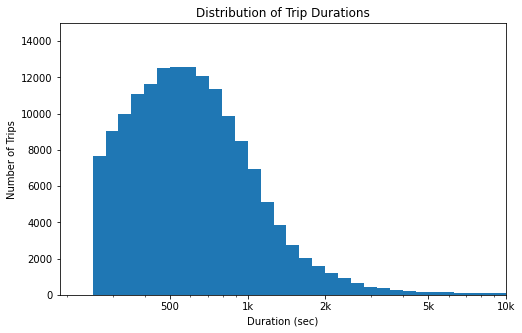

In [0]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

Trip duration is mostly concentrated on the lower spectrum. Most of the values are less than 2000 seconds with peak around 600 seconds. Trip duration values first increases starting from arount 8000 values at 0 to 12500 values at around 600 but then starts to fall and raching below 2000 values under 2000 sec.

Now lets look at other factors like start and end station id and birth year

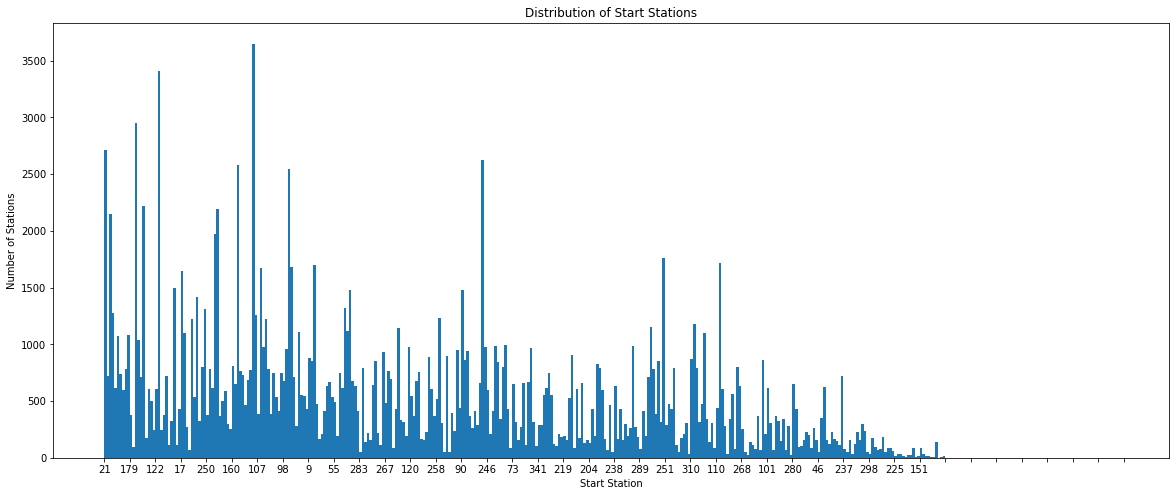

In [0]:
df['start_station_id'] = df['start_station_id'].str.replace('NULL','0')
# Plotting start station id distribution.
binsize = 1
bins = np.arange(0, df['start_station_id'].astype('float64').max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

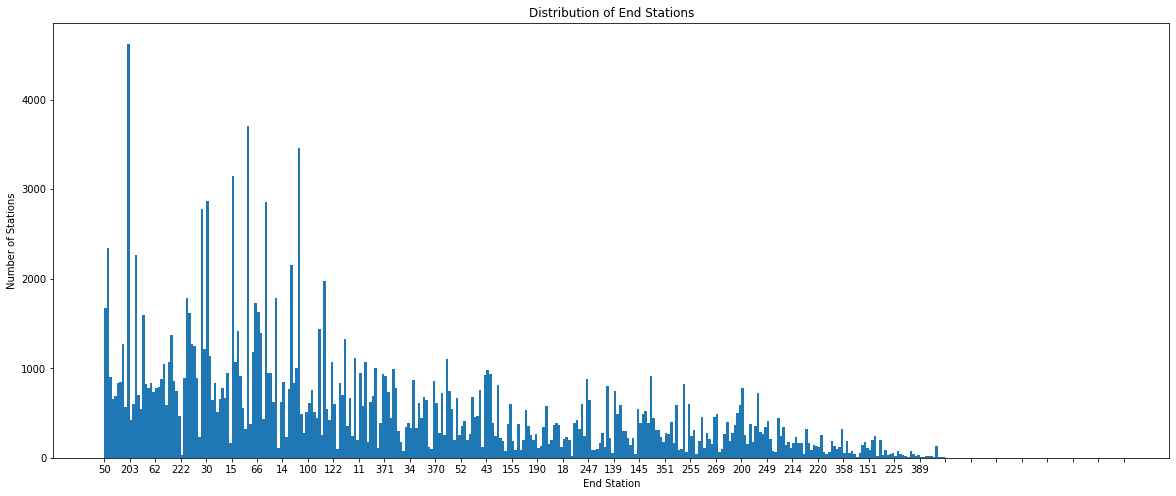

In [0]:
df['end_station_id'] = df['end_station_id'].str.replace('NULL','0')
# Plotting end station id distribution.
binsize = 1
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

We can see that same stations are more frequent as start stations and end stations.

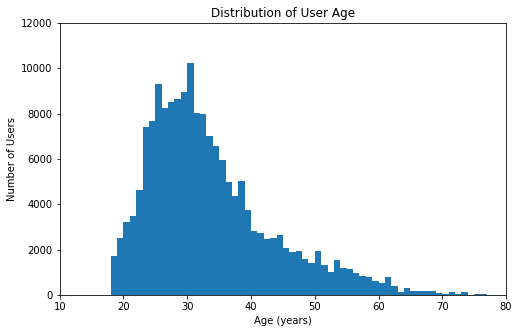

In [0]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

We can see that the distribution is more concentrated between 20 to 40 years old.

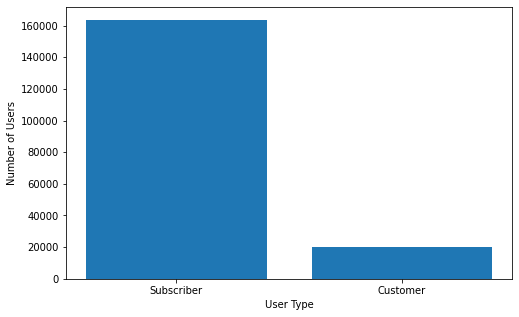

In [0]:
# plotting types of users on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

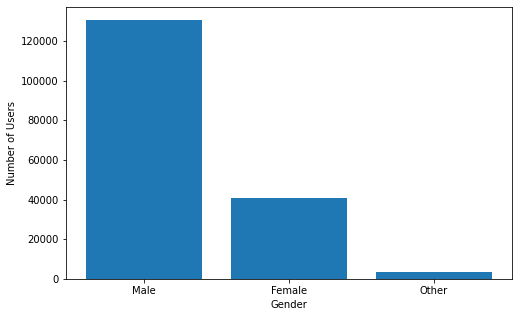

In [0]:
# plotting genders on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The trip duration takes a large amount of values and is concentrated to a tail so I looked at it in log transform and found that peak occurs at 600 seconds starting from 0 and then distribution starts to dip and does not regain any more peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Birth year is converted by substracting the year from current year so this gives us a distibution for age, this action is performed as age gives a better better perception regarding trip duration dependency. Also start station and end station is plotted in a larger plot because it gives a better insight regarding traffic of bikes at certain stations.

## Bivariate Exploration

Lets first have a look at the correlation between trip duration and age.

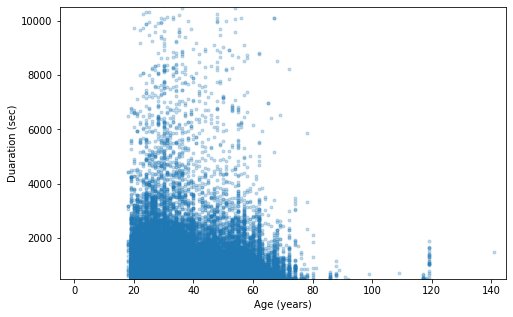

In [0]:
#set member_birth_year as integer type
df['member_birth_year'] = df['member_birth_year'].astype('float64')

plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()

As most of the durations are below 6000 and age is below 80, lets crop the plot till those values.

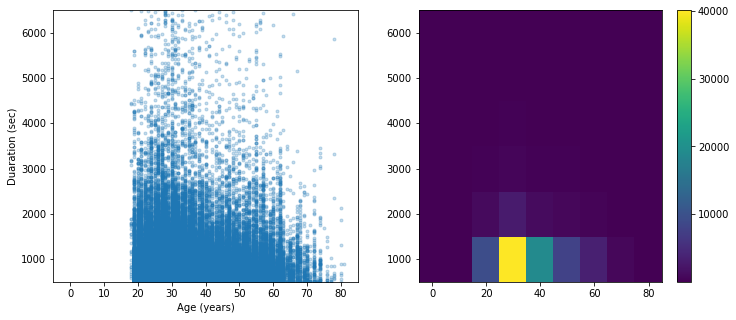

In [0]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - df['member_birth_year']), df['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

By looking at these olys we can say that most frequent users of bikes are aged between 20 and 45. Higher duration is clocked by younger members.

Now lets look into the duration dependency on start station and end station.

In [0]:
sorted(df.start_station_id.unique())

Out[41]: ['0',
 '10',
 '100',
 '101',
 '102',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '112',
 '113',
 '114',
 '115',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '162',
 '163',
 '164',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '209',
 '21',
 '210',
 '211',
 '212',
 '213',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '22',
 '220',
 '221',
 '222',
 '223',
 '224',
 '225',
 '226',
 '227',
 '228',
 '229',
 '23',
 '230',
 '231',
 '232',
 '233',
 '234',
 '235',
 '236',
 '237',
 '238',
 '239',
 '24',
 '240',
 '241',
 '242',
 '243',
 '244',
 '245',
 '246',
 '247',
 '248',
 '249',
 '25',
 '250',
 '251',
 '252',
 '253',
 '254',
 '255',
 '256',
 '257',
 '258',
 '259',
 '26',
 '262',
 '263',
 '265',
 '266',
 '267',
 '268',
 '269',
 '27',
 '270',
 '271',
 '273',
 '274',
 '275',
 '276',
 '277',
 '278',
 '279',
 '28',
 '280',
 '281',
 '282',
 '283',
 '284',
 '285',
 '286',
 '287',
 '288',
 '289',
 '29',
 '290',
 '291',
 '292',
 '294',
 '295',
 '296',
 '297',
 '298',
 '299',
 '3',
 '30',
 '300',
 '301',
 '303',
 '304',
 '305',
 '306',
 '307',
 '308',
 '309',
 '31',
 '310',
 '311',
 '312',
 '313',
 '314',
 '315',
 '316',
 '317',
 '318',
 '321',
 '323',
 '324',
 '327',
 '33',
 '336',
 '337',
 '338',
 '339',
 '34',
 '340',
 '341',
 '343',
 '344',
 '345',
 '349',
 '35',
 '350',
 '351',
 '355',
 '356',
 '357',
 '358',
 '359',
 '36',
 '360',
 '361',
 '362',
 '363',
 '364',
 '365',
 '368',
 '369',
 '37',
 '370',
 '371',
 '372',
 '373',
 '375',
 '377',
 '378',
 '380',
 '381',
 '383',
 '385',
 '386',
 '388',
 '389',
 '39',
 '398',
 '4',
 '41',
 '42',
 '43',
 '44',
 '46',
 '47',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '66',
 '67',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '95',
 '96',
 '97',
 '98',
 '99']

In [0]:
t = []

all_start_station_ids = sorted(df.start_station_id.unique())
for x in all_start_station_ids :
    t.append(df[df.start_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(t)

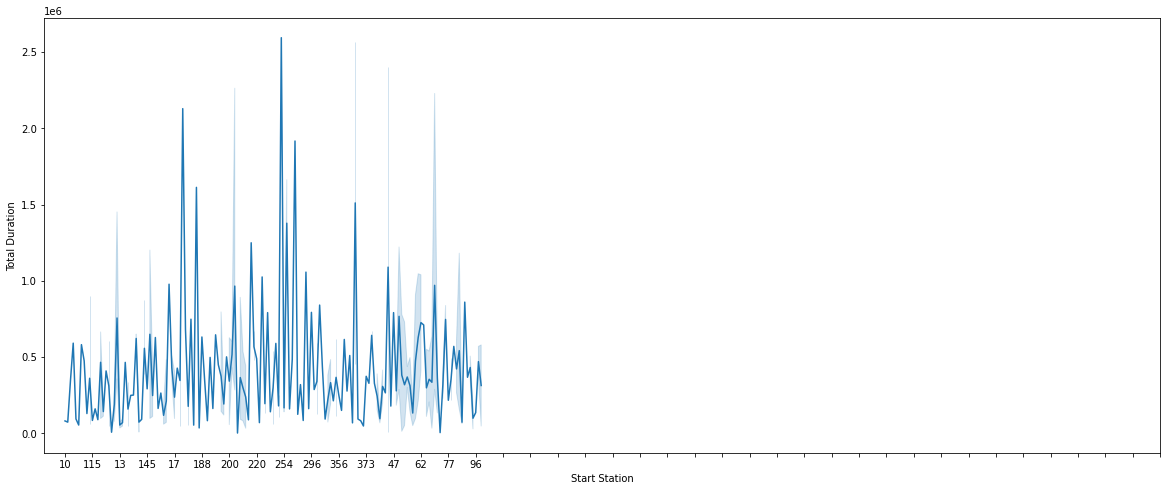

In [0]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('Start Station')
plt.ylabel('Total Duration')
plt.show()

In [0]:
t = []

all_end_station_ids = sorted(df.end_station_id.unique())
for x in all_end_station_ids :
    t.append(df[df.end_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(t)

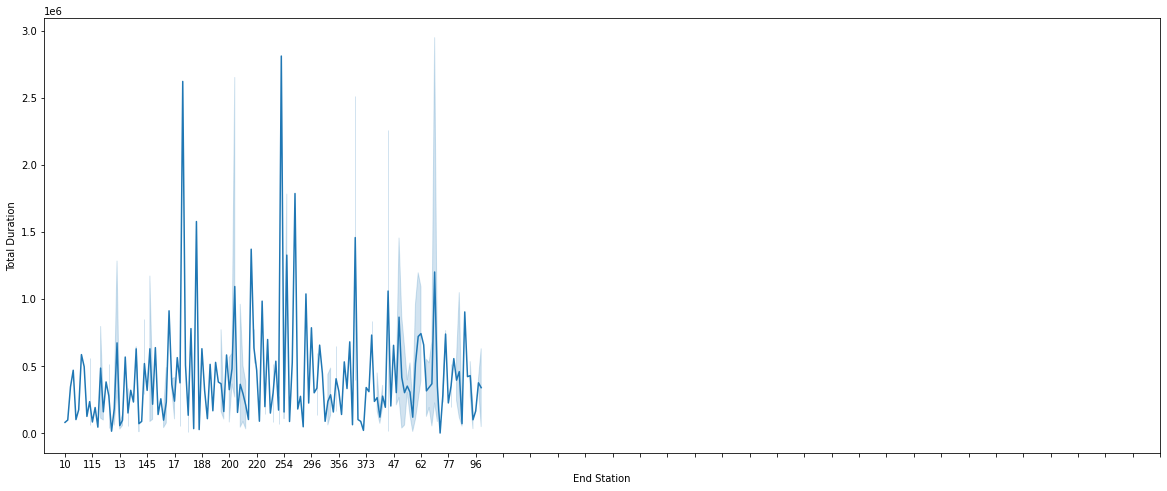

In [0]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('End Station')
plt.ylabel('Total Duration')
plt.show()

By looking at these plots you can see that trip duration for some station as start station is higher and for some stations as end station is higher. By this we can see that what stations result in starting of longer trips and what stations comes end of longer trips.

Now lets look into the dependency of trip durations on gender and on member type.

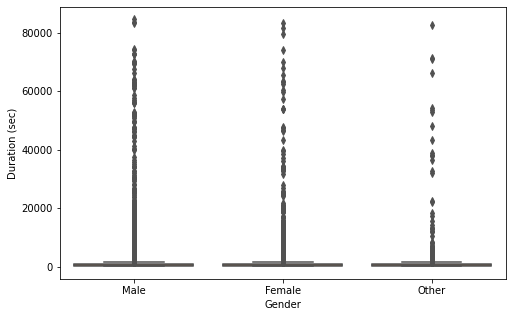

In [0]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

As we can see, values are vey widespread to see a box plot, so lets trim duration to max 2000 sec to get clearer picture.

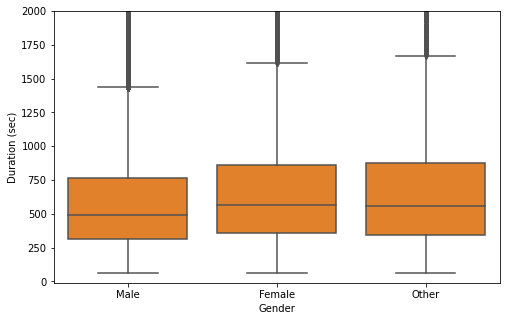

In [0]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

Though quantity of male riders are very high then other and female but we can see that higher percentage of female and other rides longer trips then males.

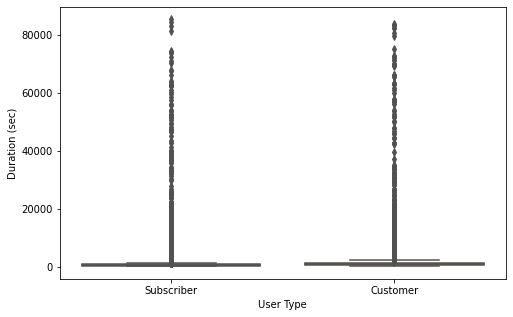

In [0]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

As we can see, values are vey widespread to see a box plot, so lets trim duration to max 2500 sec to get clearer picture.

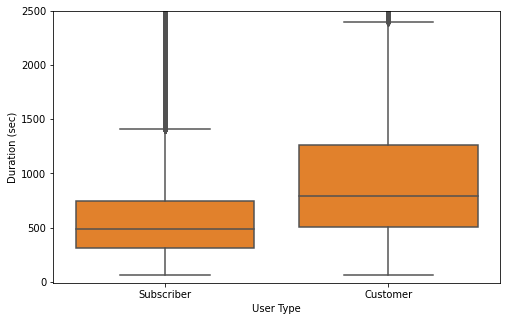

In [0]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

Here we can see that higher percentage of customers are taking longer trips then compared to subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Trip Duration is very dependendable on the age of the member, I havent expected the=at much dependency. On the other hand Start station and end station does not much determine the trip duration. It only suggests that some starting stations are having higher trip durations as starting point and some end stations are having higher trip durations as ending point.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I have expected that categorial variable's like user type and gender values having higher value to be having higher trip duration but it is the other way round like for gender, value of male members is very high but the percentage of female members to take longer trips is higher.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the two categorical measures gender and user type play into the relationship between trip duration and age.

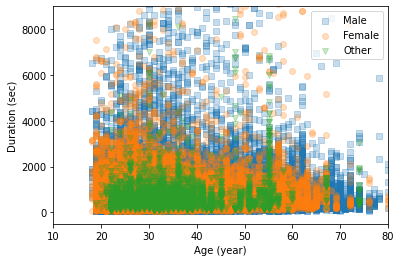

In [0]:
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]

for gender, marker in gender_markers:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

This plot does not show quit a clear picture, lets seperate all three genders into different graphs.

/databricks/python/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
 warnings.warn(msg, UserWarning)

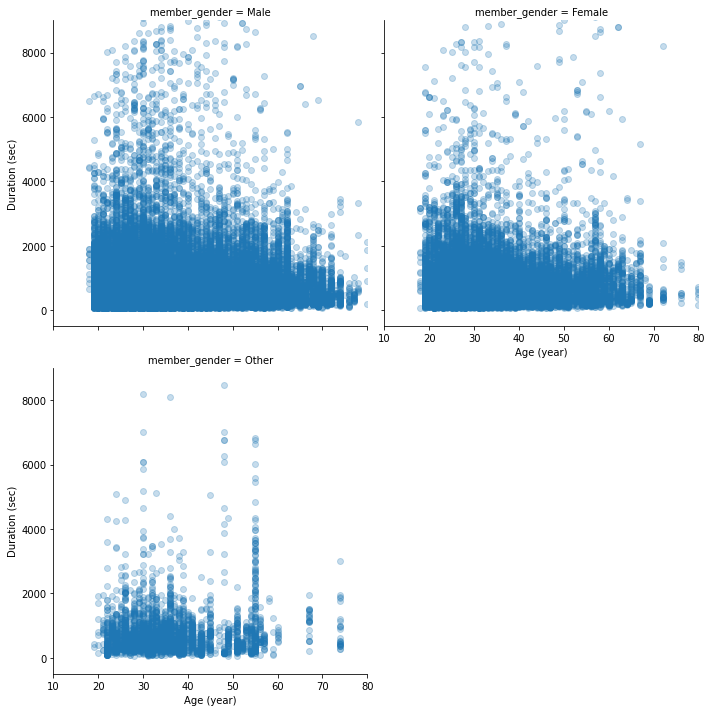

In [0]:
df['age'] = (2019 - df['member_birth_year'])
genders = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)')

plt.show()

Here we are seeing a jump in duration for others at an older age (around 60 years).

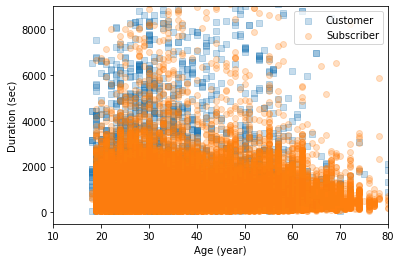

In [0]:
user_type_markers = [['Customer', 's'],['Subscriber', 'o']]

for utype, marker in user_type_markers:
    df_utype = df[df['user_type'] == utype]
    plt.scatter((2019 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Customer','Subscriber'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

/databricks/python/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
 warnings.warn(msg, UserWarning)

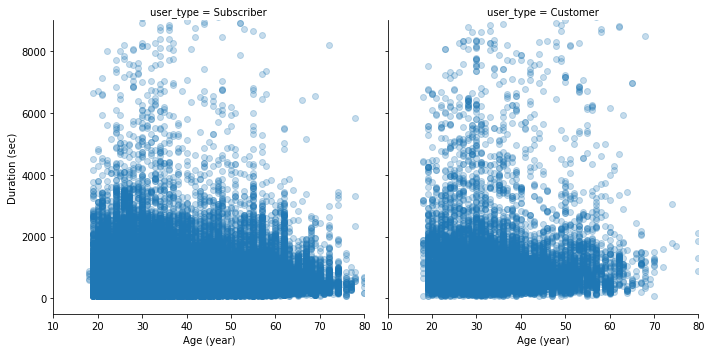

In [0]:
user_types = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_types.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration (sec)')

plt.show()

In this case both Customer and Subscriber are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Here we observed that though the number of higher duration trip is higher for male but percentage is higher for women and other, also other has one more peak at nearly the age of 60 years for higher duration time.
For different user types both are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers having better trip duration.

### Were there any interesting or surprising interactions between features?
A second peak for other gender at an older is a surprise.